In [0]:
from __future__ import absolute_import, division, print_function 

import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

import seaborn as sns

%matplotlib inline

In [7]:
!pip install Tensorflow

In [0]:
import keras
from keras.models  import Sequential, K
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras import metrics

In [9]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**dataset** **that** has *been* *cleened*

In [10]:
from google.colab import files
uploaded = files.upload()

Saving datetimeunix.csv to datetimeunix (1).csv


In [11]:
import io
dl_df=pd.read_csv(io.StringIO(uploaded['datetimeunix.csv'].decode('utf-8')))
dl_df.head(3)

,Unnamed: 0,event_date,year,time_precision,event_type,inter1,interaction,latitude,longitude,geo_precision,fatalities,timestamp,timestampcon,newtimestamp
0,0,31 December 2015,2015,1,Riots/Protests,6,60,5.5263,7.4896,1,0,1524053911,2015-12-31,1.451520e+09
1,1,31 December 2015,2015,1,Riots/Protests,6,60,5.1066,7.3667,1,0,1524053911,2015-12-31,1.451520e+09
2,2,30 December 2015,2015,1,Strategic development,4,47,5.4411,6.2140,1,0,1524053911,2015-12-30,1.451434e+09


*splitting the dataset into features and target*

In [0]:
x=dl_df.drop(['Unnamed: 0','event_date','event_type','timestamp','timestampcon'], axis=1)
y=dl_df['event_type']

In [13]:
dl_df['event_type'].value_counts()

Riots/Protests                                2348
Violence against civilians                    1718
Battle-No change of territory                 1019
Battle-Government regains territory            198
Remote violence                                183
Strategic development                          135
Non-violent transfer of territory               51
Battle-Non-state actor overtakes territory       7
Headquarters or base established                 4
Name: event_type, dtype: int64

target transformation of the categorical variable

In [0]:

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

y= np_utils.to_categorical(encoded_Y)

importing the percentage splitting

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [16]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [18]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

OPTIMIZATION MODEL

In [19]:
model= Sequential()

In [0]:
from keras import layers
model.add(layers.Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9,))

# Adding the second hidden layer
model.add(layers.Dense(units = 96, kernel_initializer = 'uniform', activation = 'relu'))
model.add(layers.Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
model.add(layers.Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
model.add(layers.Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
model.add(layers.Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model.add(layers.Dense(units = 9, kernel_initializer = 'uniform', activation = 'softmax'))
from keras import optimizers
sgd=optimizers.SGD(lr=0.01, decay=1e-6)
# Compiling the ANN
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = [metrics.categorical_accuracy])

In [22]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 10, epochs = 100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 4530 samples, validate on 1133 samples
Epoch 1/100





4530/4530 [==============================] - 3s 579us/step - loss: 1.8925 - categorical_accuracy: 0.4126 - val_loss: 1.6885 - val_categorical_accuracy: 0.4184
Epoch 2/100
4530/4530 [==============================] - 2s 410us/step - loss: 1.5945 - categorical_accuracy: 0.4137 - val_loss: 1.5350 - val_categorical_accuracy: 0.4184
Epoch 3/100
4530/4530 [==============================] - 2s 406us/step - loss: 1.4951 - categorical_accuracy: 0.4137 - val_loss: 1.4780 - val_categorical_accuracy: 0.4184
Epoch 4/100
4530/4530 [==============================] - 2s 392us/step - loss: 1.4536 - categorical_accuracy: 0.4137 - val_loss: 1.4547 - val_categorical_accuracy: 0.4184
Epoch 5/100
4530/4530 [==============================] - 2s 387us/step - loss: 1.4355 - categorical_accuracy: 0.4137 - val_loss: 1.4447 - val_categorical_accuracy: 0.

In [0]:
y_pred_class_nn_1 = model.predict_classes(x_test)
y_pred_prob_nn_1 = model.predict(x_test)

In [24]:
y_pred_class_nn_1[:]

array([6, 6, 6, ..., 6, 6, 6])

In [25]:
y_pred_prob_nn_1[:]

array([[0.03660822, 0.18940303, 0.00100671, ..., 0.4048084 , 0.02245315,
        0.3028704 ],
       [0.03660822, 0.18940303, 0.00100671, ..., 0.4048084 , 0.02245315,
        0.3028704 ],
       [0.03660822, 0.18940303, 0.00100671, ..., 0.4048084 , 0.02245315,
        0.3028704 ],
       ...,
       [0.03660822, 0.18940303, 0.00100671, ..., 0.4048084 , 0.02245315,
        0.3028704 ],
       [0.03660822, 0.18940303, 0.00100671, ..., 0.4048084 , 0.02245315,
        0.3028704 ],
       [0.03660822, 0.18940301, 0.00100671, ..., 0.40480837, 0.02245315,
        0.30287042]], dtype=float32)

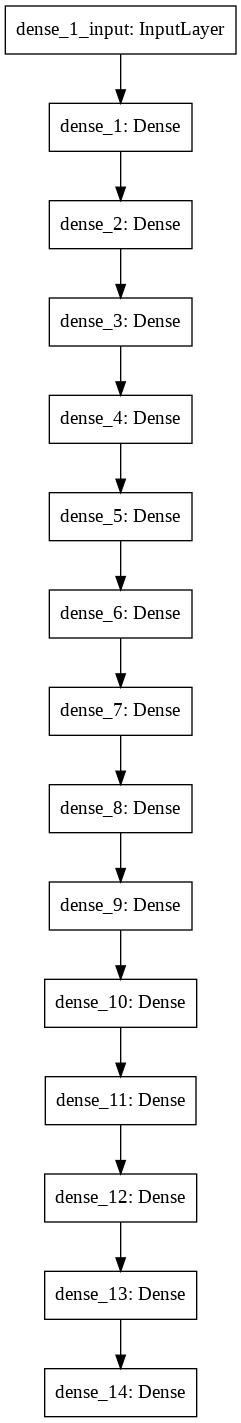

In [26]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

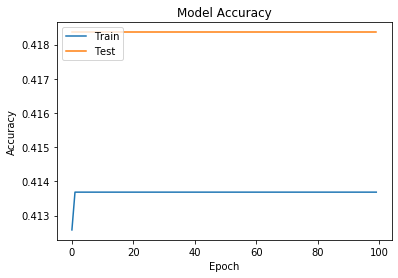

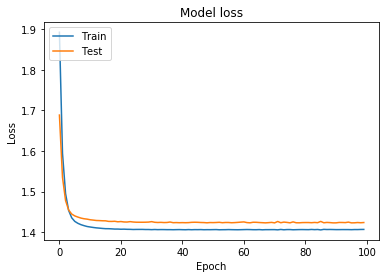

In [27]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

REGULARISED MODEL

In [0]:
model1= Sequential()

In [29]:
model1.add(layers.Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
model1.add(Dropout(0.25))
# Adding the second hidden layer
model1.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model1.add(Dropout(0.25))
model1.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model1.add(Dropout(0.25))
model1.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model1.add(Dropout(0.25))
model1.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model1.add(Dropout(0.25))
model1.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model1.add(Dropout(0.25))

# Adding the output layer
model1.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [metrics.categorical_accuracy])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [30]:
history1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 10, epochs = 100)

Train on 4530 samples, validate on 1133 samples
Epoch 1/100
4530/4530 [==============================] - 1s 306us/step - loss: 2.3356 - categorical_accuracy: 0.3611 - val_loss: 1.4960 - val_categorical_accuracy: 0.4184
Epoch 2/100
4530/4530 [==============================] - 1s 176us/step - loss: 1.5336 - categorical_accuracy: 0.4086 - val_loss: 1.5142 - val_categorical_accuracy: 0.4184
Epoch 3/100
4530/4530 [==============================] - 1s 178us/step - loss: 1.5011 - categorical_accuracy: 0.4088 - val_loss: 1.5114 - val_categorical_accuracy: 0.4184
Epoch 4/100
4530/4530 [==============================] - 1s 184us/step - loss: 1.4687 - categorical_accuracy: 0.4121 - val_loss: 1.4443 - val_categorical_accuracy: 0.4184
Epoch 5/100
4530/4530 [==============================] - 1s 183us/step - loss: 1.4539 - categorical_accuracy: 0.4135 - val_loss: 1.4296 - val_categorical_accuracy: 0.4184
Epoch 6/100
4530/4530 [==============================] - 1s 180us/step - loss: 1.4254 - categoric

In [0]:
y_pred_class_nn_2 = model1.predict_classes(x_test)
y_pred_prob_nn_2 = model1.predict(x_test)

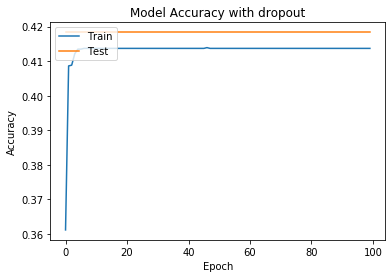

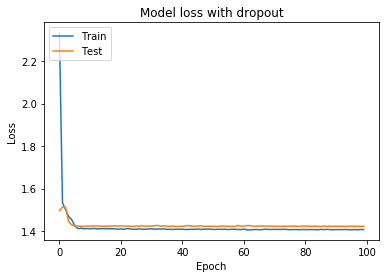

In [34]:
plt.plot(history1.history['categorical_accuracy'])
plt.plot(history1.history['val_categorical_accuracy'])
plt.title('Model Accuracy with dropout')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss with dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

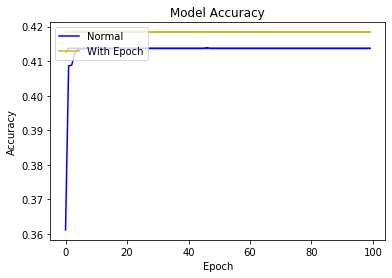

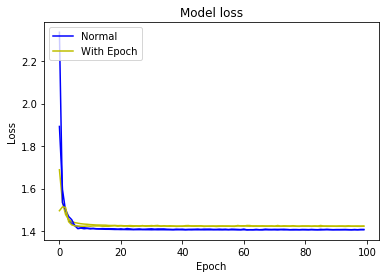

In [33]:
plt.plot(history.history['categorical_accuracy'],'b')
plt.plot(history.history['val_categorical_accuracy'],'y',label='with dropout')
plt.plot(history1.history['categorical_accuracy'],'b')
plt.plot(history1.history['val_categorical_accuracy'],'y',label='with dropout')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Normal', 'With Epoch'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], 'b')
plt.plot(history.history['val_loss'],'y',label='with dropout')
plt.plot(history1.history['loss'],'b')
plt.plot(history1.history['val_loss'],'y', label='with dropout')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Normal', 'With Epoch'], loc='upper left')
plt.show()

In [0]:
model2=Sequential()